<a href="https://colab.research.google.com/github/princeAnalyst-ML/princeAnalyst-ML/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
#ranks in tensors
rank_1=tf.Variable(['come'],tf.string)
rank_1

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'come'], dtype=object)>

In [ ]:
rank_2=tf.Variable([['come'],['go']],tf.strings)
rank_2

<tf.Variable 'Variable:0' shape=(2, 1) dtype=string, numpy=
array([[b'come'],
       [b'go']], dtype=object)>

In [ ]:
tensor_1=tf.ones([3,4,5])
tensor_1
tensor_2=tf.reshape(tensor_1,[4,5,3])
tensor_2
tensor_3=tf.reshape(tensor_2,[4,-1])
tensor_3
tensor_4=tf.reshape(tensor_3,[3,-1])
tensor_4

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]], dtype=float32)>

In [ ]:
with tf.compat.v1.Session() as sess:
  tf.add(2,4)

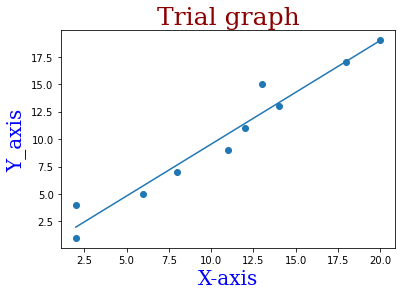

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([2,2,6,8,11,12,14,13,18,20])
y=np.array([1,4,5,7,9,11,13,15,17,19])

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':25}

plt.scatter(x,y)

plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

plt.xlabel('X-axis',fontdict=font1)
plt.ylabel('Y_axis',fontdict=font1)
plt.title('Trial graph',fontdict=font2)
plt.show()

In [ ]:
from google.colab import files
upload=files.upload()

Saving test_data.csv to test_data (2).csv
Saving train_data.csv to train_data.csv


In [ ]:
import pandas as pd
df_train=pd.read_csv('train_data.csv')

df_test=pd.read_csv('test_data.csv')

In [ ]:
y_train=df_train.pop('Survived')
y_test=df_test.pop('Survived')

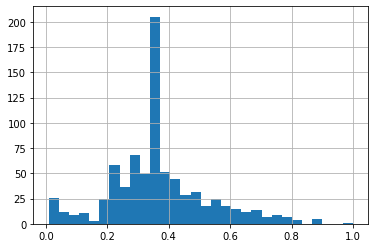

In [ ]:
df_train.Age.hist(bins=30)

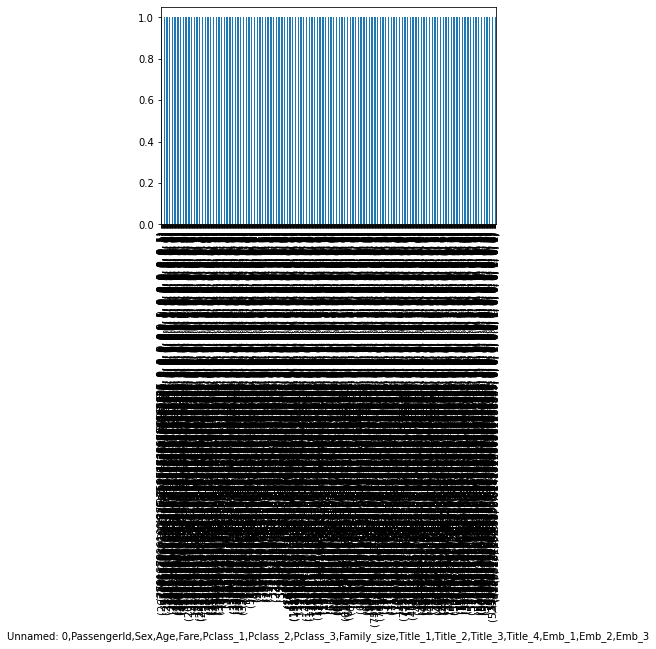

In [ ]:
df_train.value_counts().plot(kind='bar')

Text(0.5, 0, '% Survive')

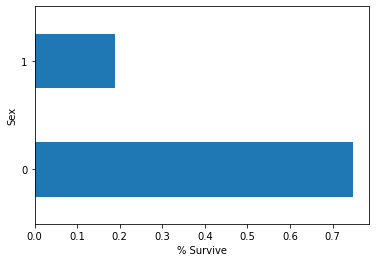

In [ ]:
pd.concat([df_train,y_train],axis=1).groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel("% Survive")

In [ ]:
from tensorflow._api.v2 import feature_column
categorical_num=['Sex']

numerical_nums=['Age','Fare']

feature_num=[]
for feature_count in categorical_num:
  vocubalary=df_train[feature_count].unique();
  feature_num.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_count,vocubalary))

for feature_count in numerical_nums:
  feature_num.append(tf.feature_column.numeric_column(feature_count,dtype=tf.float32))

print(feature_num)


[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=(1, 0), dtype=tf.int64, default_value=-1, num_oov_buckets=0), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
df_train[feature_count].unique()

array([0.01415106, 0.13913574, 0.01546857, 0.1036443 , 0.01571255,
       0.0165095 , 0.10122886, 0.04113566, 0.02173075, 0.05869429,
       0.03259623, 0.05182215, 0.06104473, 0.01533038, 0.03122992,
       0.05684821, 0.02537431, 0.03513366, 0.01410226, 0.05074862,
       0.01567195, 0.06929139, 0.06126432, 0.51334181, 0.01537917,
       0.01541158, 0.0541074 , 0.28598956, 0.01512699, 0.02049464,
       0.16038672, 0.10149724, 0.01411046, 0.02194234, 0.01849397,
       0.04098927, 0.08115719, 0.03025399, 0.04231498, 0.03474329,
       0.07746484, 0.01522459, 0.14976542, 0.12097534, 0.05416439,
       0.0915427 , 0.1561496 , 0.16293235, 0.05445717, 0.02975782,
       0.01592394, 0.01690807, 0.14346245, 0.02821272, 0.11027246,
       0.01493181, 0.05660423, 0.02434958, 0.01756683, 0.01854277,
       0.01520019, 0.09193308, 0.03093714, 0.06709553, 0.11940565,
       0.04015973, 0.06764049, 0.12366717, 0.04489301, 0.15085515,
       0.01689187, 0.01517579, 0.04713766, 0.01917712, 0.02822

In [ ]:
#input function. defines how data is going to be divided into sections/batches to fit our model.
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
  def input_function():
    ds=df_train.shuffle(1000)
  ds=df_train.batch(batch_size).repeat(num_epochs)
